In [1]:
import xarray as xr

In [2]:
import cartopy.crs as ccrs

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import cmocean

In [6]:
def convert_pr_units(darray):
    """Convert kg m-2 s-1 to mm day-1.
    Args:
        darray (xarray.DataArray): Precipitation data
        
    """
    
    darray.data = darray.data * 86400
    darray.attrs['units'] = 'mm/day'
    
    return darray


def create_plot(clim, model_name, season, gridlines=False):
    """Plot the precipitation climatoloty.
    
    Args:
        clime (xarray.DataArray): Precipitation climatology data
        season (str): Season
        
    """
    
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.haline_r)
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
    
    title='%s precipitation climatoloty (%s)' %(model_name, season)
    plt.title(title)
    
    
        
def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatoloty.
    
    Args:
        pr_file (str): Precipitation data file
        season (str): Season (3 letter abbreviation, e.g. JJA)
        gridlines (bool): Select whether to plot gridlines
        
    """
    
    dset = xr.open_dataset(pr_file)    
    clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)   
    clim = convert_pr_units(clim)
    create_plot(clim, dset.attrs['model_id'], season, gridlines=gridlines)
    plt.show() 

In [7]:
help(plot_pr_climatology)

Help on function plot_pr_climatology in module __main__:

plot_pr_climatology(pr_file, season, gridlines=False)
    Plot the precipitation climatoloty.
    
    Args:
        pr_file (str): Precipitation data file
        season (str): Season (3 letter abbreviation, e.g. JJA)
        gridlines (bool): Select whether to plot gridlines



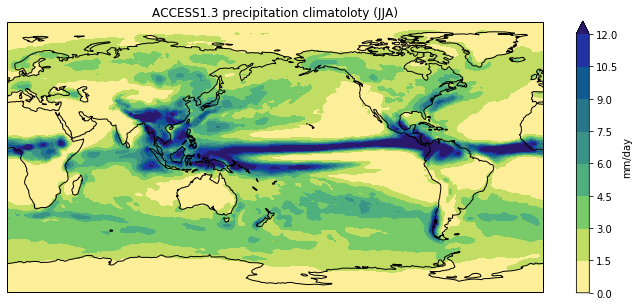

In [8]:
plot_pr_climatology('data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc','JJA')
plt.show()

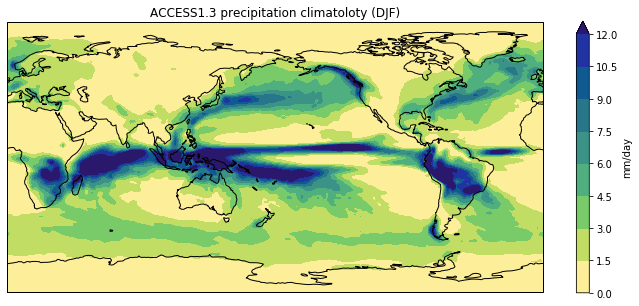

In [10]:
plot_pr_climatology('data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc','DJF')
plt.show()

In [11]:
import unit_conversion
clime.data = unit_conversion.convert_pr_units(clim.data)

ModuleNotFoundError: No module named 'unit_conversion'